In [126]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sn 
import warnings
warnings.filterwarnings("ignore")

## Preprocessing

In [380]:
# In the first step we import the Dataset and get a first look over the data we have to deal with.
data = pd.read_csv(r"/Users/Nicolas/Desktop/Churn_Modelling.csv")
data.head()
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In general it can be seen that there are 10.000 observations and 14 different variables.
8 of those variables are categorial and 6 are continous. 

The column "Exited" seems to store our target variable, wether a customers churns or not.

In [326]:
# After getting a first glimpse on the dataset we have to check if there are any NA in the dataset
data.isnull().values.any()

False

In [327]:
# Now we can start preprocessing the dataset.
# The first step would be to remove all the unncessary columns in the datase. 
# Since The Rownumber, the name or the Id probably won't provide any usefull information, we can delete those 
# from our Dataset
del data["RowNumber"]
del data["Surname"]
del data["CustomerId"]

# It would also be possible to exclude “balance” because the range of the values is very big and
# it is not clear if the value of 0 is to interpret as a balance of 0 or as a missing value.
# But we will keep it for now.

In [328]:
# After the dataset is cleaned we can start with discriptive statistics.
# First we want to figure out how many people have churned
Churned = data["Exited"]
Ratio_churn = data["Exited"].sum()/data["Exited"].count()

In [329]:
# This shows that roughly 20% of the customers exited.
Ratio_churn

0.2037

In [335]:
# Now we look if there are any results that suggest that any of the variables contributes to the exit state
Geo = data.groupby(data["Geography"]).sum()

In [336]:
# We can see that most churning people come from Germany. Furthermore Germans only make up a quarter of 
# all the Customers. So this gives a hint, that Germans probably a higher risk of churning.
Geo["Exited"]

Geography
France     810
Germany    814
Spain      413
Name: Exited, dtype: int64

In [337]:
# Another thing is that women churn more often than men. But in generall there are less female customers than male.
Gender = data.groupby(data["Gender"]).sum()
Gender["Exited"]

Gender
Female    1139
Male       898
Name: Exited, dtype: int64

In [338]:
# The majority of the People churning have had a credit card.
CreditCard = data.groupby(data["HasCrCard"]).sum()
CreditCard["Exited"]

HasCrCard
0     613
1    1424
Name: Exited, dtype: int64

In [339]:
# But on the other hand, most of the churners also are not active members. 
Member = data.groupby(data["IsActiveMember"]).sum()
Member["Exited"]

IsActiveMember
0    1302
1     735
Name: Exited, dtype: int64

In [383]:
# The average age of a churner is 44 compared to the mean age of only 39
print(data[data["Exited"]==1]["Age"].mean())
print(data["Age"].mean())

44.8379970544919
38.9218


### So after looking at 4 key categorical metrics, we can see four things: 
- Membership
- Gender
- Geography
- Credit Card

After looking into the statistics of the data, it is obvious that the different continous variables have different
units. To compare values with different units it is usually necessary to normalize
the data to make it interpretable. The next step therefore is to normalize attributes with
integer values:
CreditScore, Age, Tenure, Balance, NumOfProd, Salary.

In [341]:

minVec = data[["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]].min().copy()
maxVec = data[["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]].max().copy()
data[["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]] = (data[["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]]-minVec)/(maxVec-minVec)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,France,Female,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1
1,0.516,Spain,Female,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0
2,0.304,France,Female,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1
3,0.698,France,Female,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0
4,1.000,Spain,Female,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0


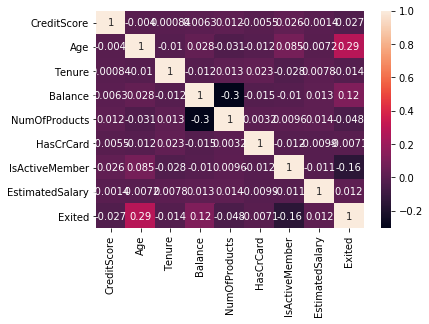

In [342]:
# One further step is to look at a correlation matrix to maybe see if there are some patterns that can be seen 
# visually between some variables. 
# One thing that strikes is that the number of products and the balance have a relatively high negative correlation. 
# That means that they seldomly occur togheter. 
# But in general we can not retrive much information from this corrmax, because we have many categorial variables. 

corrMatrix = data.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [343]:
# It seems that we have to build a more complex approach to solve the problem

In [140]:
# For building a ML- Modell the first step is to randomly split the data into a training and a test set.
# Before we do that, we have to preprocess the variables in order to achieve better results.

In [344]:
# Since we have many categorical variables we first have to prepare them. 
# The first step is to replace 0s with -1 at binary variables, so that there is a stronger distinction. 
for i in range(len(data)):
    if data["HasCrCard"][i] == 0:
        data["HasCrCard"][i] = -1
for i in range(len(data)):
    if data["IsActiveMember"][i] == 0:
        data["IsActiveMember"][i] = -1

In [345]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,France,Female,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1
1,0.516,Spain,Female,0.310811,0.1,0.334031,0.000000,-1,1,0.562709,0
2,0.304,France,Female,0.324324,0.8,0.636357,0.666667,1,-1,0.569654,1
3,0.698,France,Female,0.283784,0.1,0.000000,0.333333,-1,-1,0.469120,0
4,1.000,Spain,Female,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,France,Male,0.283784,0.5,0.000000,0.333333,1,-1,0.481341,0
9996,0.332,France,Male,0.229730,1.0,0.228657,0.000000,1,1,0.508490,0
9997,0.718,France,Female,0.243243,0.7,0.000000,0.000000,-1,1,0.210390,1
9998,0.844,Germany,Male,0.324324,0.3,0.299226,0.333333,1,-1,0.464429,1


In [346]:
# One other thing is to use one hot encoding to make the Geography and the Gender Variables useable.
# Therefore we create new variables and assign boolean values if that condition is true or not. 
data["Geography_France"] = 0
for i in range(len(data)):
    if data["Geography"][i] == "France":
        data["Geography_France"][i] = 1
    else:
        data["Geography_France"][i] = -1

In [347]:
data["Geography_Germany"] = 0
for i in range(len(data)):
    if data["Geography"][i] == "Germany":
        data["Geography_Germany"][i] = 1
    else:
        data["Geography_Germany"][i] = -1

In [348]:
data["Geography_Spain"] = 0
for i in range(len(data)):
    if data["Geography"][i] == "Spain":
        data["Geography_Spain"][i] = 1
    else:
        data["Geography_Spain"][i] = -1

In [349]:
data["Gender_Female"] = 0
for i in range(len(data)):
    if data["Gender"][i] == "Female":
        data["Gender_Female"][i] = 1
    else:
        data["Gender_Female"][i] = -1
        
data["Gender_Male"] = 0
for i in range(len(data)):
    if data["Gender"][i] == "Male":
        data["Gender_Male"][i] = 1
    else:
        data["Gender_Male"][i] = -1

In [350]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,France,Female,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,-1,-1,1,-1
1,0.516,Spain,Female,0.310811,0.1,0.334031,0.000000,-1,1,0.562709,0,-1,-1,1,1,-1
2,0.304,France,Female,0.324324,0.8,0.636357,0.666667,1,-1,0.569654,1,1,-1,-1,1,-1
3,0.698,France,Female,0.283784,0.1,0.000000,0.333333,-1,-1,0.469120,0,1,-1,-1,1,-1
4,1.000,Spain,Female,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,-1,-1,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,France,Male,0.283784,0.5,0.000000,0.333333,1,-1,0.481341,0,1,-1,-1,-1,1
9996,0.332,France,Male,0.229730,1.0,0.228657,0.000000,1,1,0.508490,0,1,-1,-1,-1,1
9997,0.718,France,Female,0.243243,0.7,0.000000,0.000000,-1,1,0.210390,1,1,-1,-1,1,-1
9998,0.844,Germany,Male,0.324324,0.3,0.299226,0.333333,1,-1,0.464429,1,-1,1,-1,-1,1


In [351]:
# Now that we created categories with one hot encoding, we can delete the actual from the dataset.
del data["Geography"]
del data["Gender"]
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,-1,-1,1,-1
1,0.516,0.310811,0.1,0.334031,0.000000,-1,1,0.562709,0,-1,-1,1,1,-1
2,0.304,0.324324,0.8,0.636357,0.666667,1,-1,0.569654,1,1,-1,-1,1,-1
3,0.698,0.283784,0.1,0.000000,0.333333,-1,-1,0.469120,0,1,-1,-1,1,-1
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,-1,-1,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.283784,0.5,0.000000,0.333333,1,-1,0.481341,0,1,-1,-1,-1,1
9996,0.332,0.229730,1.0,0.228657,0.000000,1,1,0.508490,0,1,-1,-1,-1,1
9997,0.718,0.243243,0.7,0.000000,0.000000,-1,1,0.210390,1,1,-1,-1,1,-1
9998,0.844,0.324324,0.3,0.299226,0.333333,1,-1,0.464429,1,-1,1,-1,-1,1


In [286]:
# Now we split the dataframe into a training set with 75% of the data and a test set with 25% of the data.

Y = data["Exited"]
X = data.drop(["Exited"], axis = 1)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=100)

# Now we can use scikit-learn to build different models and test them against each other and selct the best one. 
We will test 4 different machine learning modells to try and predict the churn prediction
These models are: 
- Logistic regression 
- Decision Tree
- Random Forrest
- Support Vector Machine

We will use the accuracy of each modell as a scoring parameter to compare the outcomes of the different algorithms.

In [357]:
# import the models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# At first we will create a Logistic regression modell and check the performance


In [358]:
logReg = LogisticRegression(solver = 'lbfgs')
logReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [359]:
pred_log = logReg.predict(X_test)
pred_log

array([0, 0, 0, ..., 0, 0, 0])

In [360]:
# For the scoring we now test the model and determine the number of true positives we can retrieve from our dataset.
score = logReg.score(X_test, y_test)
print(score)

0.81


With the score we can see, that our modell has an accuracy of 81 %. This means that we have a relatively good modell to predict the churning of customers. 



# Alternatively we can use a random forest model


In [363]:
Randfor = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [364]:
Randfor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [365]:
pred_forr = Randfor.predict(X_test)
pred_forr

score_forr = Randfor.score(X_test,y_test)
score_forr

0.3366055684624978

In [366]:
# The predictions of the model are floats. For easier procesing we use a 
# heaviside step function to turn them into integers of 0 and 1.


pred_forr = pred_forr -0.5
pred_forr = np.heaviside(pred_forr, 1)

In [367]:
correct = []
false = []
for i in range(len(pred_forr)):
    if pred_forr[i] == int((pd.DataFrame(y_test)).iloc[i]):
        correct.append(1)
    else:
        false.append(1)

In [321]:
# Now we can calculate the score ourselfs and get an even better result than with logisitc regression.
score_forr2 = len(correct)/len(y_test)
score_forr2

0.8536

But looking at the true positives we get an accuracy of 85.5%, which is so far the best model.

# For the next model we use SVM

In [368]:
svcclass = SVC(kernel='linear')

In [369]:
svcclass.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [370]:
pred_svc = svcclass.predict(X_test)
pred_svc

array([0, 0, 0, ..., 0, 0, 0])

In [371]:
score_svc = svcclass.score(X_test, y_test)
score_svc

0.794

The accuracy of 79 % is still good, but significantly worse than the one of the random forrest.

# The last modell we look at, will be a decision tree

In [305]:
Tree = DecisionTreeClassifier()
Tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [306]:
pred_Tree = Tree.predict(X_test)
pred_Tree

array([0, 0, 0, ..., 0, 1, 0])

In [307]:
score_Tree = Tree.score(X_test, y_test)
score_Tree

0.7708

With the decision tree we have the worst model, that is still ok with an accuracy of 77%. 

##### After determining that the best modell is the regression tree, we now want to look at the features themselves to figure out which components will probably give the best hint if a customer will churn

Feature: 0, Score: 0.14665
Feature: 1, Score: 0.24233
Feature: 2, Score: 0.06474
Feature: 3, Score: 0.14180
Feature: 4, Score: 0.11799
Feature: 5, Score: 0.02162
Feature: 6, Score: 0.05625
Feature: 7, Score: 0.14688
Feature: 8, Score: 0.01014
Feature: 9, Score: 0.01964
Feature: 10, Score: 0.01205
Feature: 11, Score: 0.00796
Feature: 12, Score: 0.01195


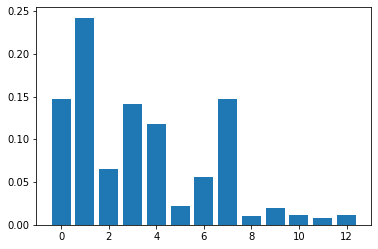

In [308]:
importance = Randfor.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [322]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,-1,-1,1,-1
1,0.516,0.310811,0.1,0.334031,0.000000,-1,1,0.562709,0,-1,-1,1,1,-1
2,0.304,0.324324,0.8,0.636357,0.666667,1,-1,0.569654,1,1,-1,-1,1,-1
3,0.698,0.283784,0.1,0.000000,0.333333,-1,-1,0.469120,0,1,-1,-1,1,-1
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,-1,-1,1,1,-1


In [ ]:
By looking at the feature importance scores we can see that the most important features for the model are 
Credit_Score, Age, Balance, the estimated salary as well as the number of products.
Even though we can not conlcude real impacts from this findigs we can keep processing the dataset 

In [382]:
import statsmodels.api as sm
X_train_lim = X_train[["CreditScore", "Age", "Balance", "EstimatedSalary", "NumOfProducts"]]
X_test_lim = X_test[["CreditScore", "Age", "Balance", "EstimatedSalary", "NumOfProducts"]]
#
log_model = sm.Logit(y_train, X_train_lim)
res = log_model.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.493294
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                 7500
Model:                          Logit   Df Residuals:                     7495
Method:                           MLE   Df Model:                            4
Date:                Fri, 25 Sep 2020   Pseudo R-squ.:                 0.02210
Time:                        17:51:09   Log-Likelihood:                -3699.7
converged:                       True   LL-Null:                       -3783.3
Covariance Type:            nonrobust   LLR p-value:                 4.131e-35
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
CreditScore        -2.6671      0.117    -22.769      0.000      -2.897      -2.438
Age           

With the now minimized dataset we can look at the features to determine their impact on the Churn prediction. 
First we can see at the p-values that, 4 Variables have a significant impact on the "Exited" state of a customer.
The Balance has a p-value of higher than 0.05 and should therefore be neglected.
The most important ones are once again **Credit Score, Age** and **NumOfProducts**. 
With the coefficients we can see, that the higher the creditscore is, the lower is the probability that a customer will churn. 
This on one hand shows that the credit scoring modell does a good job. 
On the other hand it shows that we could use the scoring model as primary source of prediction. 

Secondly the Age has a positive impact suggesting, that the higher the age of a Customer is, the more likely he is to churn. 
This also confirms the observation we made earlier that the average age of a churner is higher and the mean age. 

Lastsly also the number of products has a negative impact on the churning probability. This means that the the more products a customer has, the less likely he is to churn. 

With these three Variables we can make relatively good suggestions which customers will churn.